In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.simplefilter("ignore")
sns.set(style="darkgrid")

In [6]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Rooms: Number of rooms

Price: Price in dollars

 Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

In [8]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
df = df.dropna(axis=0)
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

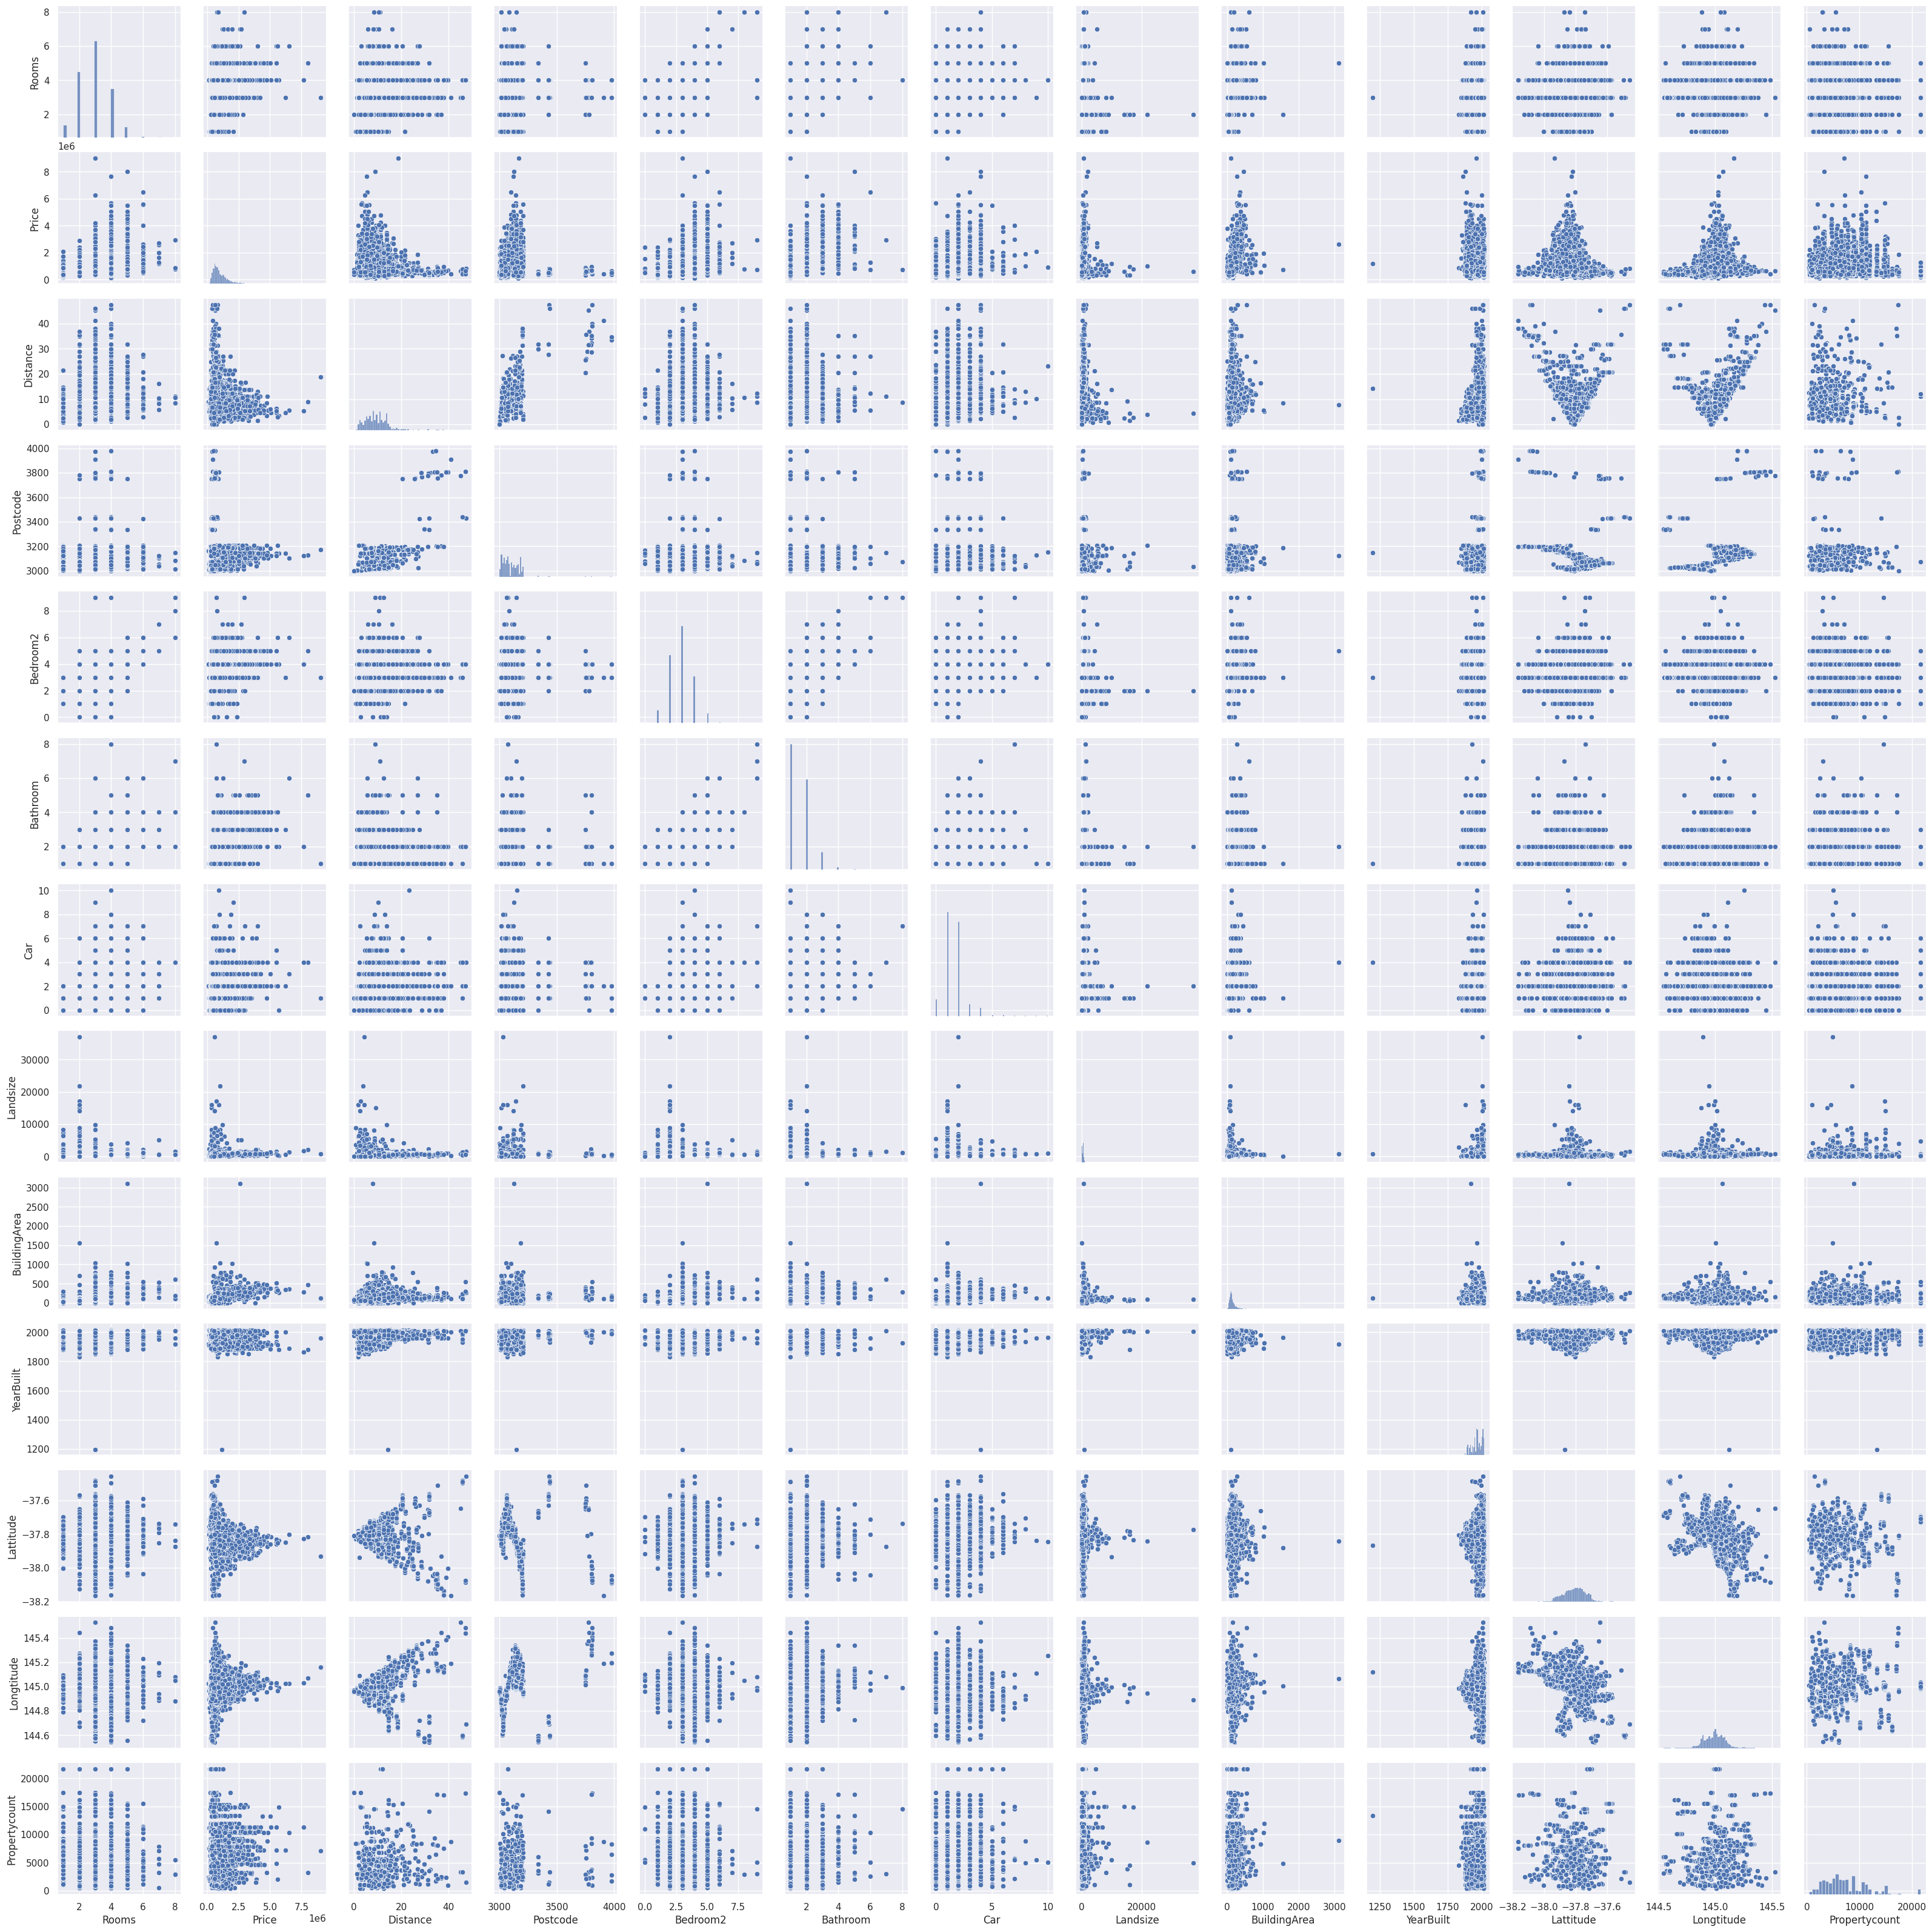

In [83]:
sns.pairplot(df)

In [43]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=10)
x_train, x_test = X_train, X_test

ValueError: ignored

<Axes: xlabel='Price', ylabel='Density'>

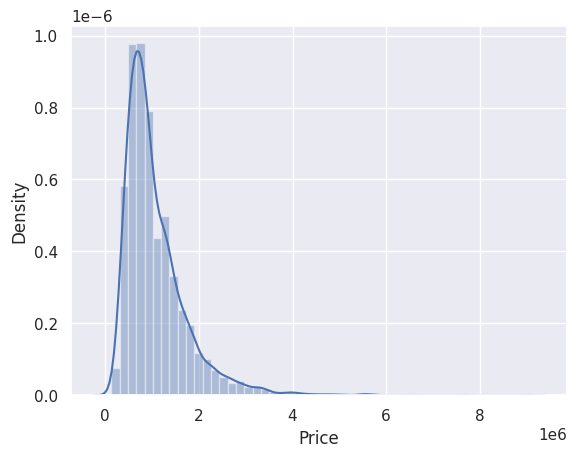

In [85]:
sns.distplot(Y_train)

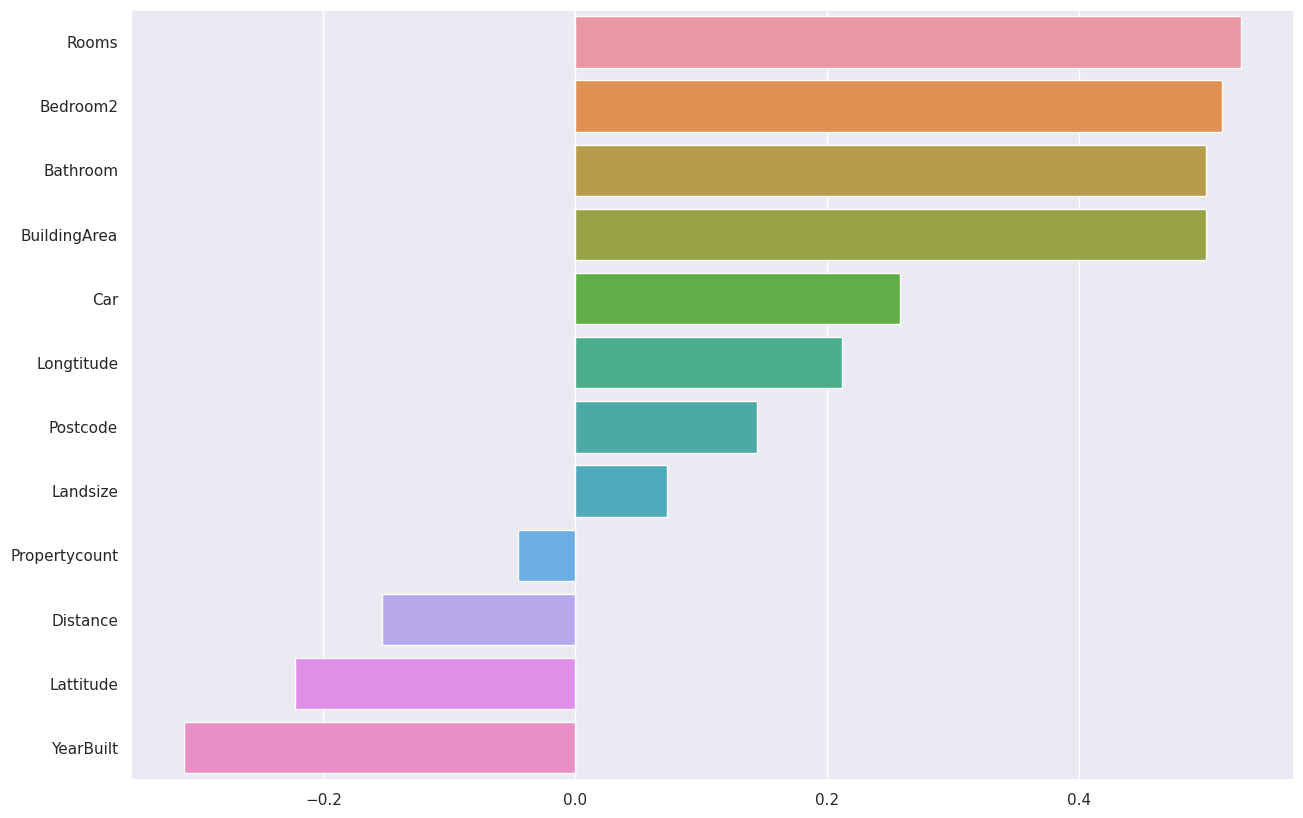

In [11]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

corrs = X_train[numeric_features].corrwith(Y_train).sort_values(ascending=False)

plot = sns.barplot(x=corrs, y=corrs.index)
plot.figure.set_size_inches(15, 10)

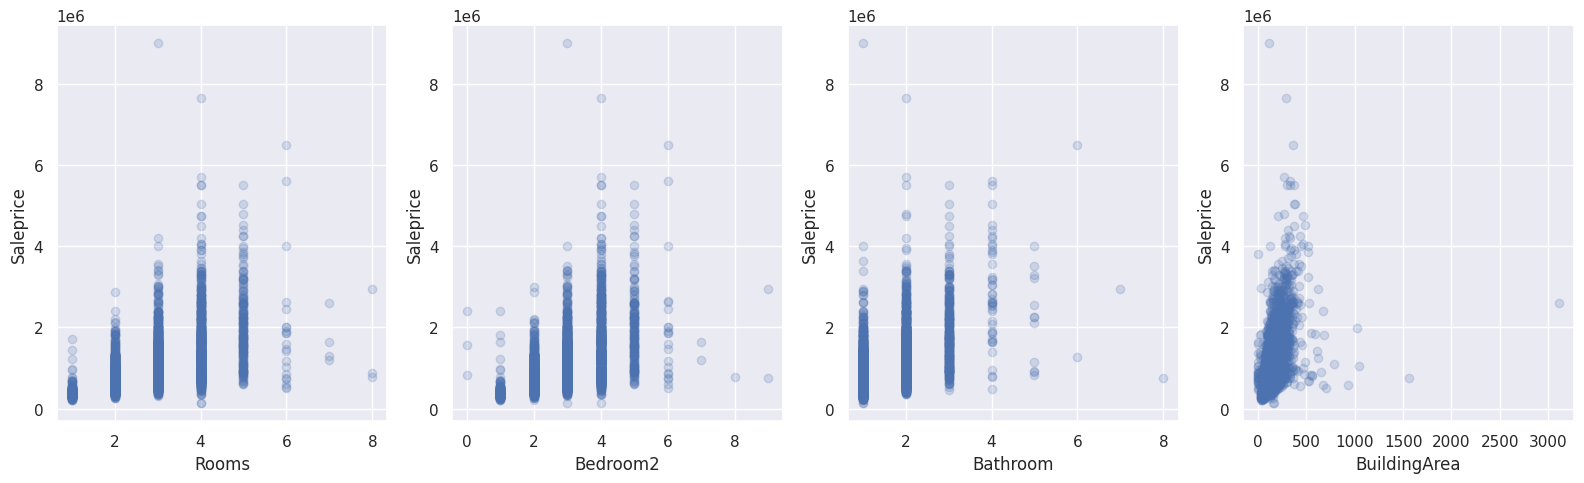

In [12]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=4)
for i, feature in enumerate(['Rooms', 'Bedroom2', 'Bathroom', 'BuildingArea']):
  axs[i].scatter(X_train[feature], Y_train, alpha=0.2)
  axs[i].set_xlabel(feature)
  axs[i].set_ylabel('Saleprice')
plt.tight_layout()

In [14]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_test = scaler.fit_transform(X_test[numeric_features])
X_train = scaler.fit_transform(X_train[numeric_features])
model = Ridge()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print('Test RMSE %.4f' % mean_squared_error(Y_test, y_pred, squared=False))
print('Train RMSE %.4f' % mean_squared_error(Y_train, y_train_pred, squared=False))

Test RMSE 403726.2622
Train RMSE 434747.5683


In [15]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, Y_train, cv=10, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -419980.9463
	-446480.9035
	-386697.5094
	-505159.2345
	-351387.9202
	-383881.7513
	-478075.4545
	-570352.1431
	-383246.9973
	-462144.2056
Mean CV MSE = 438740.7066


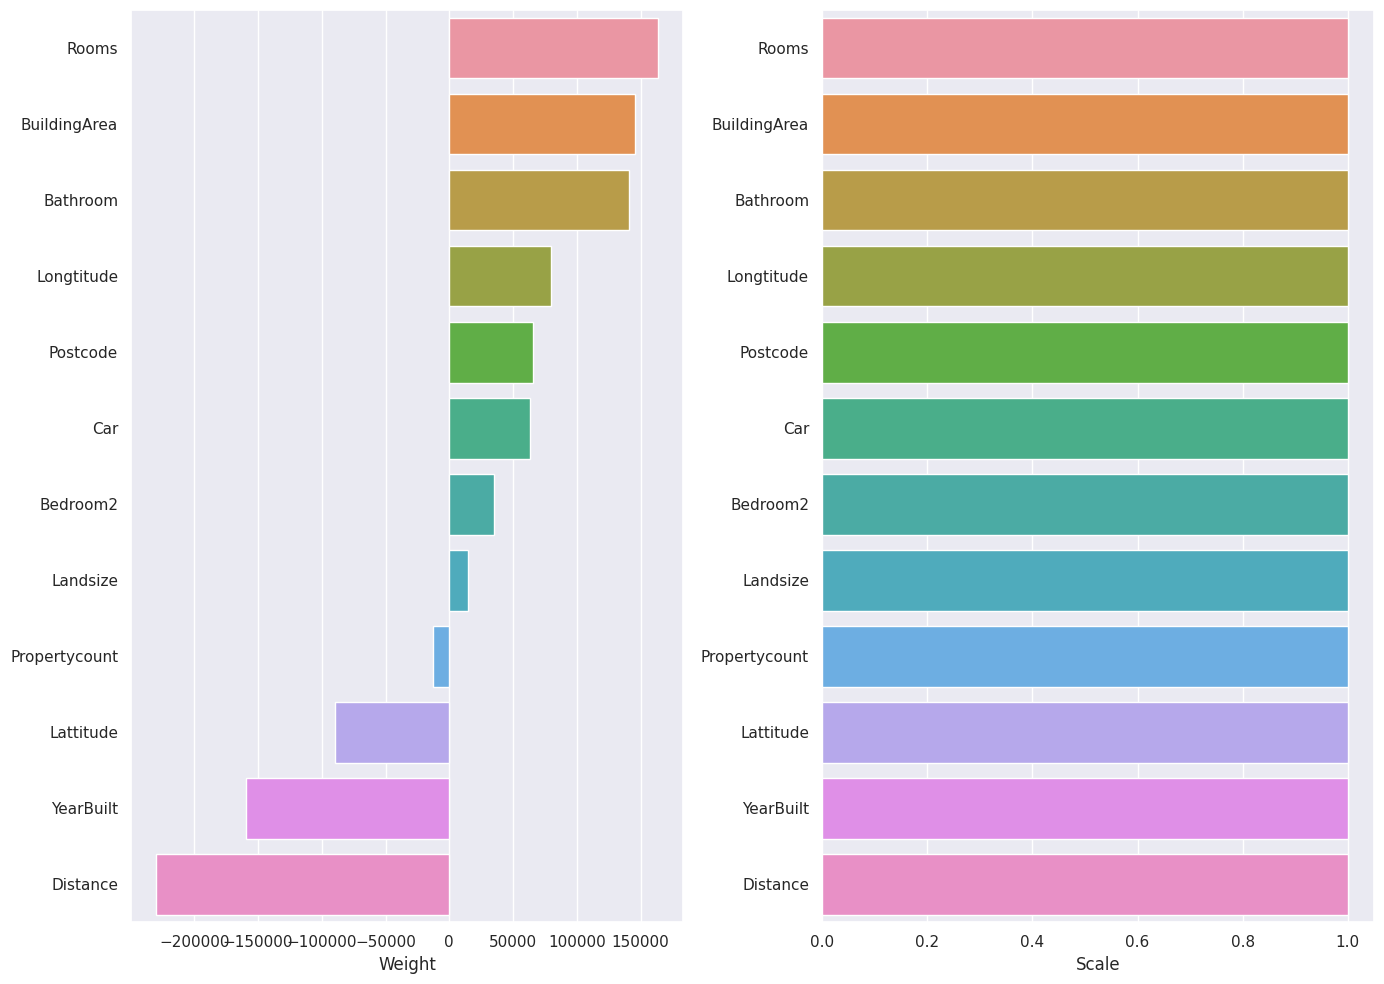

In [16]:

def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()
scales = pd.Series(data=X_train.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

Best alpha 0.1610
Best alpha 1000.0000
Best alpha 303.9195


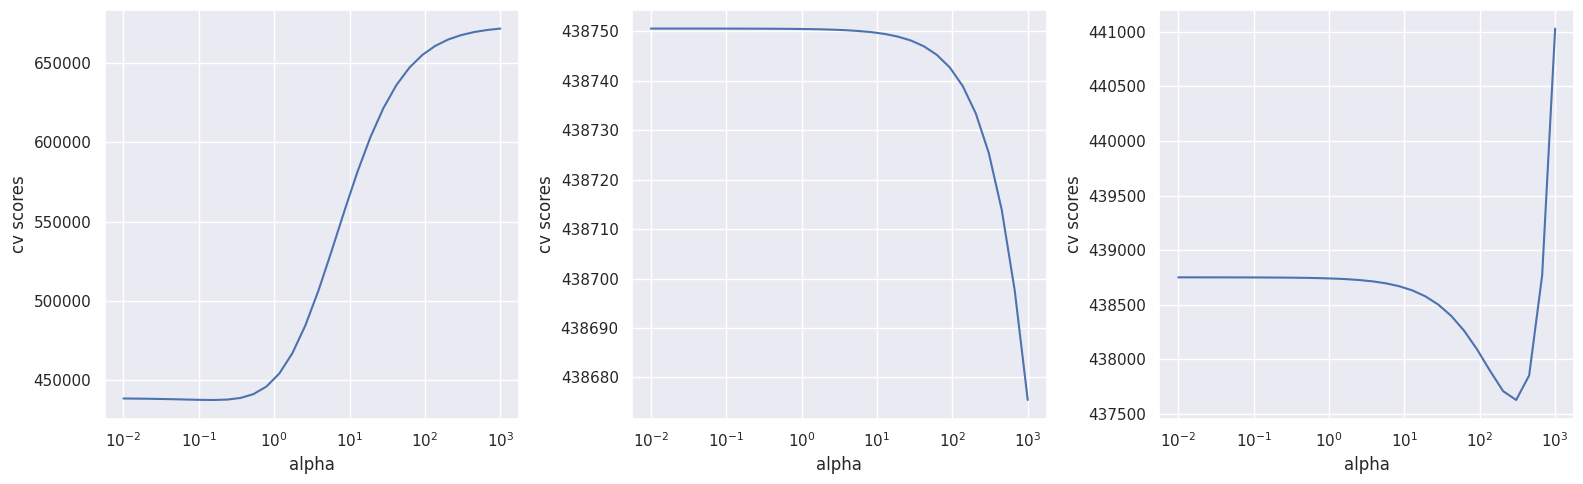

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

models_list = [ElasticNet(), Lasso(), Ridge()]
best_alphas = []
alphas = np.logspace(-2, 3, 30)
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, model_ in enumerate(models_list):
  searcher = GridSearchCV(model_, [{'alpha': alphas}], scoring='neg_root_mean_squared_error', cv=10)
  searcher.fit(X_train, Y_train)
  best_alpha = searcher.best_params_['alpha']
  print('Best alpha %.4f' % best_alpha)
  best_alphas.append(best_alpha)

  axs[i].plot(alphas, -searcher.cv_results_['mean_test_score'])
  axs[i].set_xscale('log')
  axs[i].set_xlabel('alpha')
  axs[i].set_ylabel('cv scores')
plt.tight_layout()

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

categorical = list(x_train.dtypes[x_train.dtypes == 'object'].index)
x_train[categorical] = x_train[categorical].fillna('NotGiven')
x_test[categorical] = x_test[categorical].fillna('NotGiven')
x_train[categorical].sample(20)

column_transformer = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('scaling', StandardScaler(), numeric_features)
    ]
)

pipeline_ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

pipeline_elastic = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', ElasticNet())
])
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])


for i, m in enumerate([pipeline_elastic, pipeline_lasso, pipeline_ridge]):
  model = m.fit(x_train, Y_train)
  y_pred = model.predict(x_test)
  print('Test RMSE %.4f' % mean_squared_error(Y_test, y_pred, squared=False))

Test RMSE 409447.2916
Test RMSE 364881.8570
Test RMSE 348707.3593


Best alpha 0.0100
Best alpha 303.9195
Best alpha 8.5317


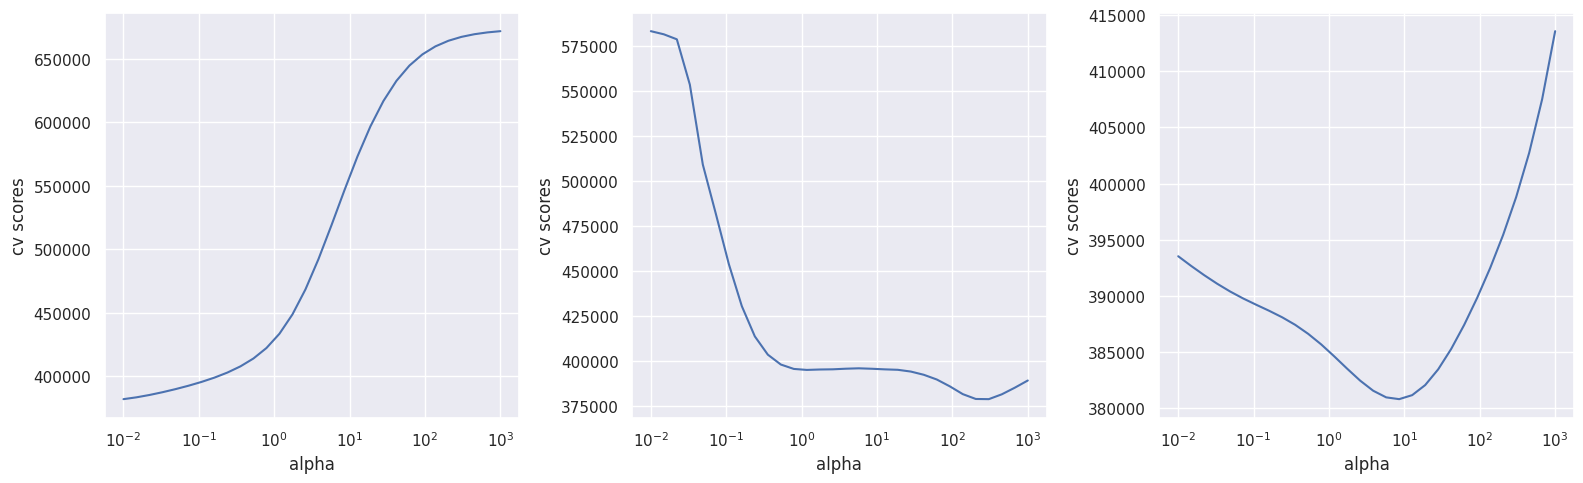

In [98]:
pipelines = [pipeline_elastic, pipeline_lasso, pipeline_ridge]
best_alphas_pipe = []
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, model_ in enumerate(pipelines):
  searcher = GridSearchCV(model_, [{'regression__alpha': alphas}], scoring='neg_root_mean_squared_error', cv=10)
  searcher.fit(x_train, Y_train)
  best_alpha = searcher.best_params_['regression__alpha']
  print('Best alpha %.4f' % best_alpha)
  best_alphas_pipe.append(best_alpha)

  axs[i].plot(alphas, -searcher.cv_results_['mean_test_score'])
  axs[i].set_xscale('log')
  axs[i].set_xlabel('alpha')
  axs[i].set_ylabel('cv scores')
plt.tight_layout()

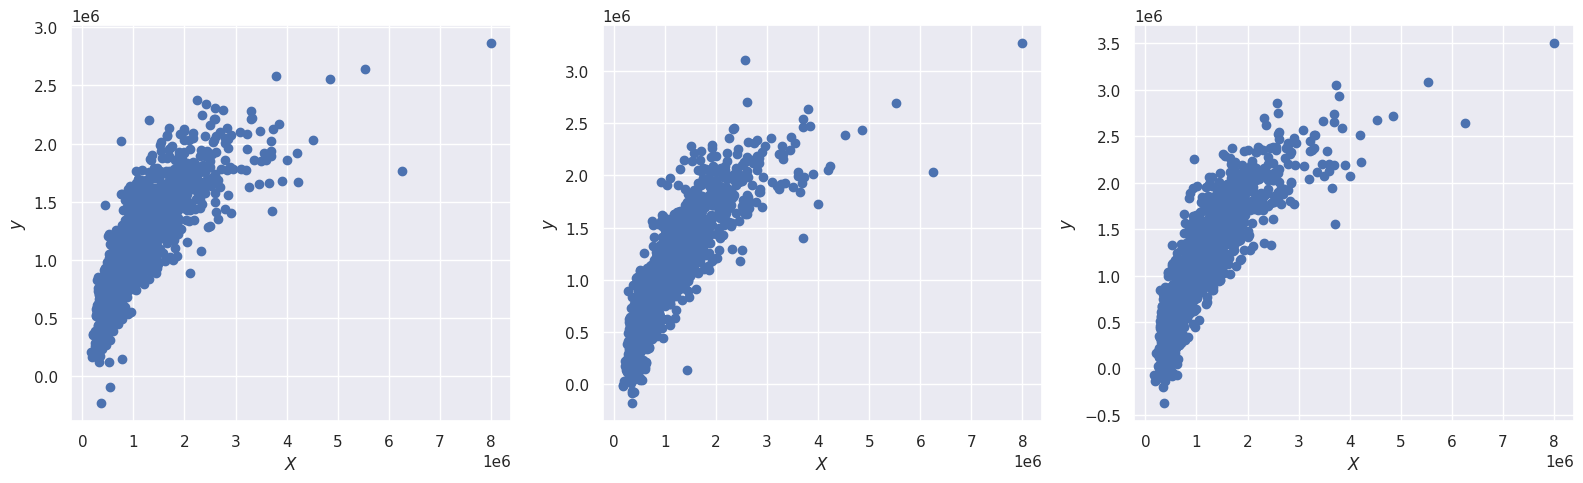

In [42]:
from sklearn.preprocessing import KBinsDiscretizer
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
pipelines = [pipeline_elastic, pipeline_lasso, pipeline_ridge]
best_alphas_pipe = [0.0100, 303.9195, 8.5317]
models_list = [ElasticNet(), Lasso(), Ridge()]
binner = KBinsDiscretizer(n_bins=5, strategy='quantile')
for i, m in enumerate(pipelines):
  model = m.fit(x_train, Y_train)
  y_pred = model.predict(x_test)
  axs[i].scatter(Y_test, y_pred, label="Data")
  axs[i].set_xlabel("$X$")
  axs[i].set_ylabel("$y$")
plt.tight_layout()

In [44]:
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import ShuffleSplit

pipeline_ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alphas_pipe[2]))
])

pipeline_elastic = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', ElasticNet(best_alphas_pipe[0]))
])
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alphas_pipe[1]))
])

model_elastic = pipeline_elastic
model_elastic.fit(x_train, Y_train)
y_pred_net = model_elastic.predict(x_test)

model_lasso = pipeline_lasso
model_lasso.fit(x_train, Y_train)
y_pred_lasso = model_lasso.predict(x_test)

model_ridge = pipeline_ridge
model_ridge.fit(x_train, Y_train)
y_pred = model_ridge.predict(x_test)

r2_net = r2_score(Y_test, y_pred_net)
r2_lasso = r2_score(Y_test, y_pred_lasso)
r2_ridge = r2_score(Y_test, y_pred)
print("R^2 score for Neural Network WITH ElasticNetCV: ", r2_net)
print("R^2 score for Neural Network WITH LassoCV: ", r2_lasso)
print("R^2 score for Neural Network WITH Ridge: ", r2_ridge)
print(max([r2_net, r2_lasso, r2_ridge]))

R^2 score for Neural Network WITH ElasticNetCV:  0.7295298148808892
R^2 score for Neural Network WITH LassoCV:  0.7361131649610264
R^2 score for Neural Network WITH Ridge:  0.7336310372770818
0.7361131649610264


In [48]:
from xgboost import XGBRegressor

pipeline_xg = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', XGBRegressor(
        n_estimators=1000, learning_rate=0.05, n_jobs=4
        ))
])

pipeline_xg.fit(x_train, Y_train)
y_pred_xg = model.predict(x_test)

r2_xgboost = r2_score(Y_test, y_pred_xg)
r2_xgboost


0.7306455573238791